# Phase 1: Data Preparation

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn loguru


In [2]:
# prompt: clone a repo and chage a branch to task 1

!git clone https://github.com/habeshaethiopia/AlphaCare-Insurance-Solutions.git
%cd AlphaCare-Insurance-Solutions
!git checkout Task1

fatal: destination path 'AlphaCare-Insurance-Solutions' already exists and is not an empty directory.
/content/AlphaCare-Insurance-Solutions
error: pathspec 'Task1' did not match any file(s) known to git


In [3]:
from loguru import logger

logger.add("eda_logs.log", format="{time} {level} {message}", level="INFO", rotation="10 MB")


1

In [4]:
from src.data_preparation import DataLoader

link = "https://drive.google.com/file/d/1g7bh8mtpwa_VWKxfjMaDH8FngiV8ieXo/view"
destination_dir = "data/raw"
loader = DataLoader(link)
loader.download_and_extract_zip(destination_dir)

Files extracted to data/raw


In [26]:
import pandas as pd

train_data = pd.read_csv("data/raw/train.csv")
test_data = pd.read_csv("data/raw/test.csv")
store_data = pd.read_csv("data/raw/store.csv")
print(train_data.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


<ipython-input-26-dd7708512d95>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("data/raw/train.csv")


# Phase 2: Exploratory Data Analysis (EDA)

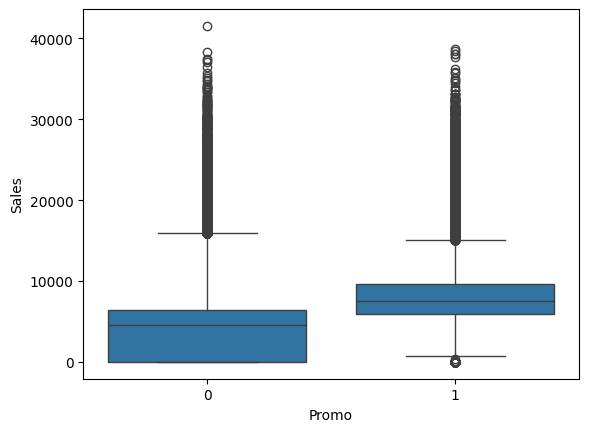

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
logging.info("Box plote started")
# Example: Visualize promo effects
sns.boxplot(x="Promo", y="Sales", data=train_data)
plt.show()


In [27]:
import pandas as pd
logging.info("data encoding started")
df=train_data

# StateHoliday: Map categorical values to integers
state_holiday_mapping = {'0': 0, 'a': 1, 'b': 2, 'c': 3}
df['StateHoliday'] = df['StateHoliday'].map(state_holiday_mapping)

# SchoolHoliday: Ensure binary encoding (0 and 1)
df['SchoolHoliday'] = df['SchoolHoliday'].astype(int)

# StoreType: Ordinal encoding
# store_type_mapping = {'a': 0, 'b': 1, 'c': 2, 'd': 3}
# df['StoreType'] = df['StoreType'].map(store_type_mapping)

# # Assortment: Ordinal encoding
# assortment_mapping = {'a': 0, 'b': 1, 'c': 2}
# df['Assortment'] = df['Assortment'].map(assortment_mapping)




train_data["DayOfWeek"] = pd.to_datetime(train_data["Date"]).dt.dayofweek
train_data["Month"] = pd.to_datetime(train_data["Date"]).dt.month
train_data["Year"] = pd.to_datetime(train_data["Date"]).dt.year
train_data.drop("Date", axis=1, inplace=True)

train_data.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year
0,1,4,5263,555,1,1,0.0,1,7,2015
1,2,4,6064,625,1,1,0.0,1,7,2015
2,3,4,8314,821,1,1,0.0,1,7,2015
3,4,4,13995,1498,1,1,0.0,1,7,2015
4,5,4,4822,559,1,1,0.0,1,7,2015


In [28]:
from sklearn.model_selection import train_test_split
logging.info("split the data training started")
X = train_data.drop("Sales", axis=1)
y = train_data["Sales"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
object_columns = X_train.select_dtypes(include=['object']).columns

# Print the unique values in each object column to understand their content
for col in object_columns:
    print(f"Unique values in column '{col}': {X_train[col].unique()}")



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
logging.info("Model training started")
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_val)
print("RMSE:", mean_squared_error(y_val, predictions, squared=False))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
logging.info("deep training started")
model = Sequential([Dense(64, activation="relu"), Dense(1)])
model.compile(optimizer="adam", loss="mse")
